In [1]:
pip install --upgrade pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/ed/8c/87ddf1fcb55d11f9f847e3c69bb1c6f8e46e2f40ab1a2d2abadb2401b007/pandas-2.2.3-cp311-cp311-win_amd64.whl.metadata
  Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl.metadata (19 kB)
Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl (11.6 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
  Rolling back uninstall of pandas
  Moving to c:\users\public\anaconda\lib\site-packages\pandas-2.0.3.dist-info\
   from C:\Users\Public\anaconda\Lib\site-packages\~andas-2.0.3.dist-info
  Moving to c:\users\public\anaconda\lib\site-packages\pandas\__init__.py
   from C:\Users\Админ\AppData\Local\Temp\pip-uninstall-4syb_vbi\__init__.py
  Moving to c:\users\public\anaconda\lib\site-packages\pandas\__pycache__\__init__.cpython-311.pyc
   from C:\Users\Админ\AppData\Local\Temp\pip-uninstall-4syb_vbi\__pyca

ERROR: Could not install packages due to an OSError: [WinError 5] Отказано в доступе: 'C:\\Users\\Public\\anaconda\\Lib\\site-packages\\pandas\\_libs\\pandas_datetime.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Загрузка данных

In [75]:
data = np.load('../data/ts_cut/ihb.npy')
data.shape

(320, 10, 246)

# Обработка NaN значений

In [76]:
# Подсчёт количетсва NaN значений 
nan_count = np.isnan(data).sum()
total_elements = data.size
nan_percentage = (nan_count / total_elements) * 100
nan_count, nan_percentage

(73600, 9.34959349593496)

In [77]:
# Вычисляем среднее по второй оси (там, где 10 временных шагов), игнорируя NaN
mean_values = np.nanmean(data, axis=1)

# Если среднее не удалось посчитать (например, если все значения NaN), заменим их на 0 или другое значение
mean_values = np.nan_to_num(mean_values, nan=0.0)  # Здесь можно указать любое значение для NaN

# Заменяем NaN на среднее значение по временной оси для каждого признака
for i in range(data.shape[1]):  # Проходим по 10 временным шагам
    data[:, i, :] = np.where(np.isnan(data[:, i, :]), mean_values, data[:, i, :])

count_nan_values(data), data.shape

C:\Users\Админ\AppData\Local\Temp\ipykernel_31848\2840068170.py:2: RuntimeWarning: Mean of empty slice
  mean_values = np.nanmean(data, axis=1)


((0, 0.0), (320, 10, 246))

# Нормализация

In [69]:
# Normalize the data (min-max scaling between 0 and 1)
data_min = np.min(data_filled, axis=(0, 1), keepdims=True)
data_max = np.max(data_filled, axis=(0, 1), keepdims=True)
data_normalized = (data_filled - data_min) / (data_max - data_min)

# Display a small part of the normalized data for verification
data_normalized[:5, :3, :5]  # First 5 samples, 3 timesteps, and 5 features

array([[[0.39537012, 0.42831526, 0.40793407, 0.54754913, 0.69851243],
        [0.43574728, 0.40052742, 0.54490576, 0.59668968, 0.70437423],
        [0.48181512, 0.14966383, 0.51320869, 0.52766235, 0.61317993]],

       [[0.70377249, 0.38079078, 0.30197175, 0.56766334, 0.25318891],
        [0.43382943, 0.35673197, 0.32137512, 0.27087797, 0.69683266],
        [0.51508923, 0.43157349, 0.47945777, 0.59235491, 0.49685195]],

       [[0.67530249, 0.50178172, 0.63500319, 0.65693646, 0.66231566],
        [0.51543166, 0.38534494, 0.12058595, 0.41395836, 0.22732578],
        [0.72371033, 0.54749681, 0.65979558, 0.4188355 , 0.71905825]],

       [[0.51066363, 0.39295868, 0.42735702, 0.4420628 , 0.40937598],
        [0.45508783, 0.49168666, 0.36273614, 0.5026296 , 0.62361662],
        [0.50770555, 0.36082875, 0.42634073, 0.61175356, 0.61667004]],

       [[0.61937068, 0.44273885, 0.73615677, 0.47999877, 0.4125751 ],
        [0.66280808, 0.60126485, 0.67281171, 0.78578288, 0.59511791],
        [0.4

In [105]:
def write_graf(data, labels):
    # Построение 3D графика
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Используем первые три признака для осей
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap='viridis', alpha=0.6)

    # Добавим названия осей
    ax.set_xlabel('Mean')
    ax.set_ylabel('Variance')
    ax.set_zlabel('Peak-to-Peak')

    # Название графика
    ax.set_title('3D Agglomerative Clustering: Mean vs Variance vs Peak-to-Peak')

    # Показать график
    plt.show()

# K-means

In [7]:
!pip install --upgrade scikit-learn

In [8]:
from sklearn.cluster import KMeans

# Преобразуем данные в двумерный формат (количество объектов, признаки)
n_samples, n_timesteps, n_features = data_normalized.shape
data_reshaped = data_normalized.reshape(n_samples * n_timesteps, n_features)

# Определяем и обучаем модель KMeans с 20 кластерами
kmeans = KMeans(n_clusters=20, random_state=42)
kmeans.fit(data_reshaped)

kmeans.labels_

array([13, 16, 18,  4,  2, 16, 15,  6, 15, 10,  6, 14,  6,  6, 19, 15, 16,
        4,  9, 19,  8,  5,  6, 19, 15,  5, 17, 19,  5,  8, 10, 14,  0,  6,
        6,  0, 15,  1, 14, 15, 17, 15, 19,  3, 15,  3,  1,  0, 12, 19,  2,
        1, 15, 14, 17,  4, 10, 14, 14, 14, 17,  5,  7,  9, 14,  0,  4,  6,
       10,  6, 10, 11, 15, 17, 14, 15, 11,  2, 13, 11,  6, 11,  6, 19,  5,
        9,  9,  2, 10,  1, 17, 11,  3,  9,  9,  9, 15, 16,  6,  1, 15, 10,
       11,  1,  0, 14, 11, 15,  8,  6,  9,  3,  3,  6, 11,  4,  6, 19, 19,
        0,  3,  3, 19,  5, 15,  1, 19, 19, 11,  6,  7, 17,  1, 14, 11,  5,
        3, 19,  5,  6, 17, 10, 19,  3,  2, 15,  6, 14, 19, 14,  9,  1, 10,
        9,  4, 10, 13, 17,  9, 17, 10,  2,  6, 11, 19,  6,  8,  8,  1, 15,
        9,  9,  8,  5, 19, 12,  8, 17, 19,  6, 15,  4, 10,  6,  1, 17,  0,
        9,  6, 19,  1,  6,  2,  5,  3, 16, 19,  6, 19, 16, 11, 15, 10,  2,
        0, 15, 15, 10,  4,  1, 12, 10, 14,  8, 19,  6,  0,  4, 15,  6, 10,
        6,  9,  8,  6,  0

In [17]:
new_data = np.zeros((320, 246))
for i in range(246):
    new_data[:, i] = np.mean(data[:, :, i], axis=1)
    

col_mean = np.nanmean(new_data, axis=0)
indices = np.where(np.isnan(new_data))
new_data[indices] = np.take(col_mean, indices[1])
   
kmeans = KMeans(n_clusters=20, random_state=42)
kmeans.fit(new_data)

kmeans.labels_

array([ 9,  3, 16, 14, 17,  3,  6,  1,  6,  2,  9,  6,  6, 16, 16,  8,  3,
        8,  6, 16,  9,  4,  9,  1,  6,  6,  5, 14,  3,  9,  6,  6, 14,  9,
        6,  6,  9,  4,  3,  9,  9,  6, 14,  3,  6,  8,  4,  3,  6, 15, 16,
        8,  9,  6,  6,  9, 13,  3,  6,  3,  2,  6,  6, 13,  3, 19,  8,  7,
        4,  2, 11,  6,  6,  5,  8,  6,  6,  9,  9,  8,  9,  2,  6, 16,  8,
       16,  3,  9,  2, 19,  2,  6,  2,  8,  3,  6,  4,  6,  9,  8,  9, 13,
        9,  8,  9,  9,  6,  9,  9,  2,  9,  6,  3, 13,  4,  7,  2, 16, 16,
        0,  6, 19,  9,  3,  8,  9, 15, 19,  8, 19,  6,  6,  9,  9, 14,  9,
        3, 16,  6, 14,  5,  8, 16,  3, 17,  6, 16,  9,  9,  6,  6, 19, 16,
        3,  8, 11,  9, 11,  6, 11,  3,  8,  6,  8, 18,  7,  9, 12,  9,  6,
        9, 16,  8,  3, 15,  9, 12,  2, 16,  9,  9,  9,  6, 19,  2,  5, 14,
       19,  9, 14,  2,  1, 17,  8,  2,  9, 16,  8, 16,  6,  6,  2,  2, 16,
        6,  6, 19, 10,  8,  9,  9, 17,  6,  8, 12, 14,  6,  7,  9,  9, 10,
       19,  0,  9,  9,  8

In [27]:
def count_nan_values(data):
    nan_count = np.isnan(data).sum()
    total_elements = data.size
    nan_percentage = (nan_count / total_elements) * 100
    return nan_count, nan_percentage

((0, 0.0), (320, 10, 246))

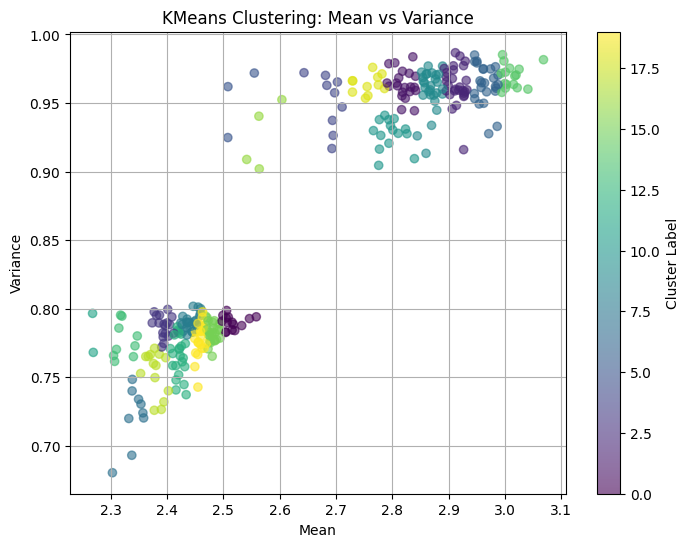

In [52]:
# Убираем вторую ось (временной ряд)
mean_data = np.mean(data, axis=1)  # Среднее по временной оси
var_data = np.var(data, axis=1)  # Дисперсия по временной оси


# Теперь создадим массивы средних значений и дисперсий для каждого объекта
mean_per_sample = np.mean(mean_data, axis=1)  # Усредняем по признакам для каждого объекта
var_per_sample = np.mean(var_data, axis=1)  # Усредняем по признакам для каждого объекта


combined_features = np.column_stack((mean_per_sample, var_per_sample))  # Размер (320, 2)


# Запуск модели кластеризации KMeans на 20 классов
kmeans = KMeans(n_clusters=20, random_state=42)
kmeans.fit(combined_features)

# Записываем полученные значения
save_predictions(kmeans.labels_, filepath='../submissions/MxDxKmeans.csv')

# Выводим полученные кластеры на графике
plt.figure(figsize=(8, 6))
plt.scatter(mean_per_sample, var_per_sample, c=labels, cmap='viridis', alpha=0.6)
plt.title('KMeans Clustering: Mean vs Variance')
plt.xlabel('Mean')
plt.ylabel('Variance')
plt.grid(True)
plt.colorbar(label='Cluster Label')
plt.show()

# Размах + дисперсия + матожидание

Предсказания сохранены в файл: ../submissions/PTPxDxMxKmeans.csv


C:\Users\Админ\AppData\Local\Temp\ipykernel_31848\655872883.py:24: MatplotlibDeprecationWarning: The clean function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use none, you no longer need to clean a Grouper instead.
  ax.scatter(combined_features[:, 0], combined_features[:, 1], combined_features[:, 2], c=kmeans.labels_, cmap='viridis', alpha=0.6)


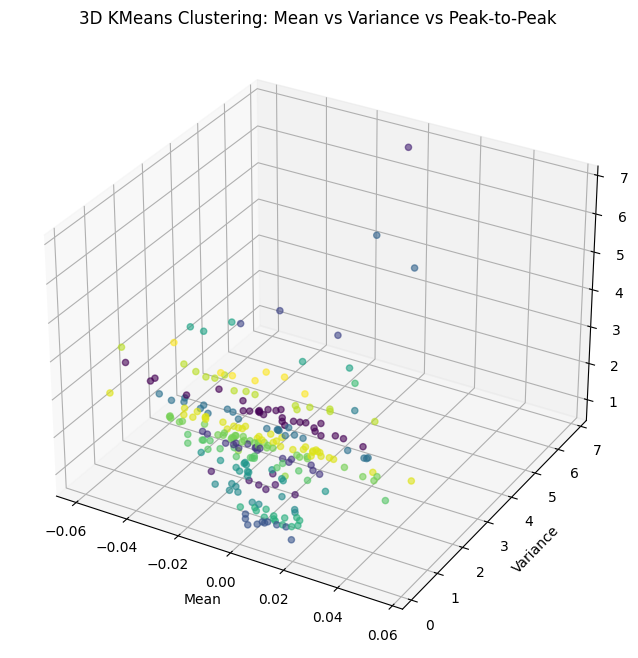

In [63]:
# Убираем вторую ось (временной ряд)
mean_data = np.mean(data, axis=1)  # Среднее по временной оси
ptp_data = np.ptp(data, axis=1)  # Среднее по временной оси
var_data = np.var(data, axis=1)  # Дисперсия по временной оси


# Теперь создадим массивы средних значений и дисперсий для каждого объекта
mean_per_sample = np.mean(mean_data, axis=1)  # Усредняем по признакам для каждого объекта
ptp_per_sample = np.mean(ptp_data, axis=1)  # Усредняем по признакам для каждого объекта
var_per_sample = np.mean(var_data, axis=1)  # Усредняем по признакам для каждого объекта


combined_features = np.column_stack((mean_per_sample, var_per_sample, ptp_per_sample))  # Размер (320, 2)

# Запуск модели кластеризации KMeans на 20 классов
kmeans = KMeans(n_clusters=20, random_state=42)
kmeans.fit(combined_features)

# Получение предсказанных меток для каждого объекта
save_predictions(kmeans.labels_, filepath='../submissions/PTPxDxMxKmeans.csv')

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(combined_features[:, 0], combined_features[:, 1], combined_features[:, 2], c=kmeans.labels_, cmap='viridis', alpha=0.6)
ax.set_xlabel('Mean')
ax.set_ylabel('Variance')
ax.set_zlabel('Peak-to-Peak')
ax.set_title('3D KMeans Clustering: Mean vs Variance vs Peak-to-Peak')
plt.show()

Предсказания сохранены в файл: ../submissions/PTPxDxKmeans.csv


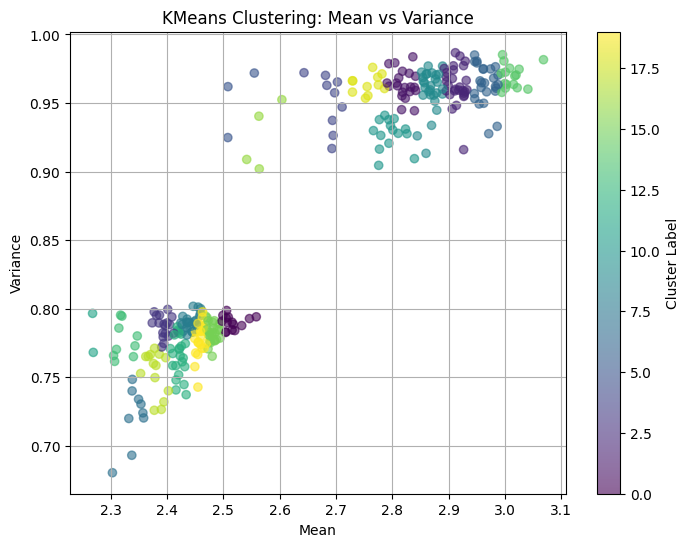

In [60]:
# Убираем вторую ось (временной ряд)
ptp_data = np.ptp(data, axis=1)  # Среднее по временной оси
var_data = np.var(data, axis=1)  # Дисперсия по временной оси


# Теперь создадим массивы средних значений и дисперсий для каждого объекта
mean_per_sample = np.mean(ptp_data, axis=1)  # Усредняем по признакам для каждого объекта
var_per_sample = np.mean(var_data, axis=1)  # Усредняем по признакам для каждого объекта


combined_features = np.column_stack((mean_per_sample, var_per_sample))  # Размер (320, 2)

# Запуск модели кластеризации KMeans на 20 классов
kmeans = KMeans(n_clusters=20, random_state=42)
kmeans.fit(combined_features)

# Получение предсказанных меток для каждого объекта
save_predictions(kmeans.labels_, filepath='../submissions/PTPxDxKmeans.csv')

# Выводим полученные кластеры на графике
plt.figure(figsize=(8, 6))
plt.scatter(mean_per_sample, var_per_sample, c=labels, cmap='viridis', alpha=0.6)
plt.title('KMeans Clustering: Mean vs Variance')
plt.xlabel('Mean')
plt.ylabel('Variance')
plt.grid(True)
plt.colorbar(label='Cluster Label')
plt.show()

In [85]:
from scipy.stats import skew

mean_data = np.mean(data, axis=1)  # Среднее по временной оси
median_data = np.median(data, axis=1)  # Медиана по временной оси
ptp_data = np.ptp(data, axis=1)  # Размах по временной оси
var_data = np.var(data, axis=1)  # Дисперсия по временной оси
min_data = np.min(data, axis=1)  # Минимум по временной оси
max_data = np.max(data, axis=1)  # Максимум по временной оси
q1_data = np.percentile(data, 25, axis=1)  # Первый квартиль
q3_data = np.percentile(data, 75, axis=1)  # Третий квартиль
iqr_data = q3_data - q1_data  # Интерквартильный размах
cv_data = np.std(data, axis=1) / mean_data  # Коэффициент вариации
skewness_data = skew(data, axis=1)  # Скос

# Теперь создадим массивы для каждого объекта
mean_per_sample = np.mean(mean_data, axis=1)  # Усредняем по признакам для каждого объекта
median_per_sample = np.mean(median_data, axis=1)  # Усредняем медианы
ptp_per_sample = np.mean(ptp_data, axis=1)  # Усредняем размах
var_per_sample = np.mean(var_data, axis=1)  # Усредняем дисперсии
min_per_sample = np.mean(min_data, axis=1)  # Усредняем минимумы
max_per_sample = np.mean(max_data, axis=1)  # Усредняем максимумы
q1_per_sample = np.mean(q1_data, axis=1)  # Усредняем Q1
q3_per_sample = np.mean(q3_data, axis=1)  # Усредняем Q3
iqr_per_sample = np.mean(iqr_data, axis=1)  # Усредняем IQR
cv_per_sample = np.mean(cv_data, axis=1)  # Усредняем коэффициенты вариации
skewness_per_sample = np.mean(skewness_data, axis=1)  # Усредняем скосы

# Объединяем все параметры в один массив
combined_features = np.column_stack((
    mean_per_sample,
    var_per_sample,
    ptp_per_sample,
#     iqr_per_sample,
#     cv_per_sample,
#     skewness_per_sample
    ))  # Размер (320, 11)

if np.isnan(combined_features).any():
    # Заполнение NaN средними значениями по строкам
    mean_values = np.nanmean(combined_features, axis=1)
    combined_features = np.where(np.isnan(combined_features), mean_values[:, None], combined_features)


# Запуск модели кластеризации KMeans на 20 классов
kmeans = KMeans(n_clusters=20, random_state=42)
kmeans.fit(combined_features)
kmeans.labels_

C:\Users\Админ\AppData\Local\Temp\ipykernel_31848\314952399.py:12: RuntimeWarning: invalid value encountered in divide
  cv_data = np.std(data, axis=1) / mean_data  # Коэффициент вариации


array([ 2,  0,  1, 17,  8, 16,  6,  6, 15,  0,  0,  2, 18, 16, 13,  8,  4,
        3,  9, 17,  2,  7, 14, 18,  7, 15,  9,  1, 14,  2,  4,  6, 10,  4,
       17,  1,  4, 17, 14,  8, 16, 10,  2,  9,  4,  6,  1,  0, 17,  2, 18,
        8, 10, 16,  0,  3,  1, 14,  4, 16,  8, 15,  1, 12,  9, 18,  3, 16,
       19,  9,  3,  6, 13,  9,  4, 14,  2,  9,  7, 16,  7,  9, 17,  2,  3,
       12,  4,  1,  3,  7,  4, 19,  9,  0,  8,  1,  2,  4, 14,  9, 10,  1,
       16,  8,  2,  9,  0,  8,  2,  8, 16, 16,  4, 13, 17,  9,  3, 12, 13,
        0, 19, 19,  1, 14,  8,  6,  6, 12,  9, 18,  1,  4, 16,  4,  6,  4,
       16,  6,  4,  7,  9,  9, 17, 16,  3, 15, 16, 16, 17, 19,  0,  6,  5,
        3, 16,  3,  7,  3, 17,  3,  4,  9, 18,  3,  2, 16,  6, 11,  5, 16,
        8, 19, 10, 14, 18,  6, 11,  9,  6,  1,  4,  3,  8, 10,  4,  9, 18,
       19, 18,  6,  4,  7,  3, 15, 16,  1,  6, 13, 10, 16,  1, 16, 16, 18,
       17,  1,  2,  3, 16, 19,  6,  4, 14,  2, 12,  7, 18,  9, 13,  8,  3,
       18,  8,  2,  9,  6

In [130]:
from sklearn.cluster import AgglomerativeClustering


agglo = AgglomerativeClustering(n_clusters=20)
agglo.fit(combined_features)

save_predictions(agglo.labels_, filepath='../submissions/PTPxDxMxagglo.csv')
# Получаем метки кластеров
labels = agglo.labels_
labels

Предсказания сохранены в файл: ../submissions/PTPxDxMxagglo.csv


array([13, 17,  2,  2,  7, 14, 15,  1, 19,  5,  5, 13,  9, 14,  6,  7,  5,
       10,  4, 12, 13,  9, 14,  9,  0, 19, 16,  2, 17, 13, 16, 15, 13,  5,
       12,  2,  5, 12, 17,  7, 16,  0, 13,  7,  5, 15,  2,  5, 12, 13,  1,
        7,  0, 14,  5, 10,  2, 17,  5, 14,  7, 19,  2, 11,  7,  1, 10, 14,
        3,  7,  4,  1,  6, 16,  5, 17, 13,  7,  1, 18,  1, 16, 12, 13, 10,
       11,  5,  2, 10,  1,  5,  0, 16,  5, 18,  2, 13,  5, 17,  7,  0,  2,
       14,  7, 13, 16,  5,  7,  9, 18, 18, 14, 16, 15, 12, 16, 10, 11,  6,
        5,  3,  3,  2, 14,  7, 15, 15, 11,  7,  1,  2, 16, 14, 16, 15, 18,
       14, 15,  5,  1, 16,  7, 12, 18, 10, 19, 14, 14,  2,  3,  5, 15,  8,
       10, 14,  4,  1,  4, 12,  4, 14,  7,  9,  4,  9, 14, 15,  8,  8, 18,
       18,  3,  0, 17,  9, 15,  3, 16, 15,  2,  5, 10, 18,  9, 18,  4,  1,
        3,  9, 15, 18,  1,  4, 19, 18,  2, 15,  6,  9, 18,  2, 14, 14,  1,
        6,  2, 13,  4, 14,  3, 15,  5, 17, 13, 11,  1,  1, 16,  6,  7,  4,
        1,  7,  9,  7, 15

Предсказания сохранены в файл: ../submissions/PTPxDxMxGaussianMixture.csv


C:\Users\Админ\AppData\Local\Temp\ipykernel_31848\3251509788.py:7: MatplotlibDeprecationWarning: The clean function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use none, you no longer need to clean a Grouper instead.
  ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap='viridis', alpha=0.6)


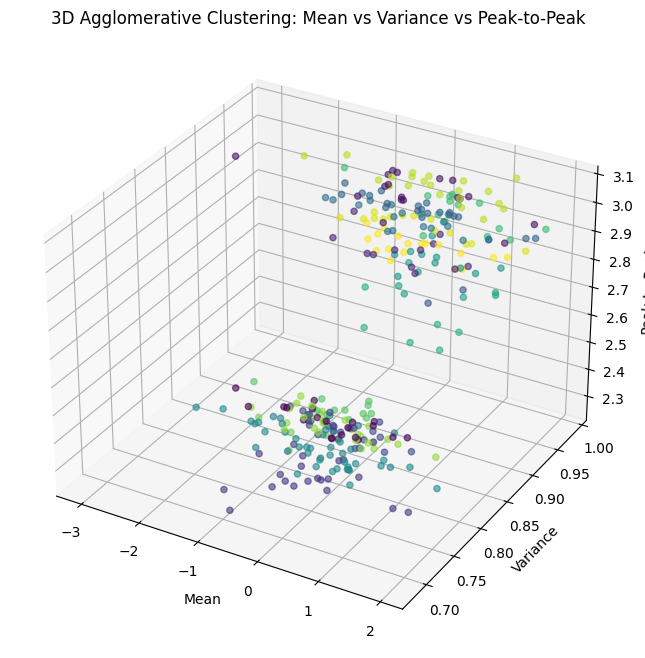

In [131]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=20, random_state=42)
gmm.fit(combined_features)

# Получение меток кластеров
gmm_labels = gmm.predict(combined_features)
save_predictions(gmm_labels, filepath='../submissions/PTPxDxMxGaussianMixture.csv')
write_graf(combined_features, gmm_labels)

In [126]:
labels_series = pd.Series(gmm_labels)  # Замените gmm_labels на метки вашего алгоритма кластеризации
cluster_counts = labels_series.value_counts().sort_index()  # Сортировка по возрастанию индексов кластеров
df_cluster_counts = pd.DataFrame({'Cluster': cluster_counts.index, 'Count': cluster_counts.values})
print(df_cluster_counts)

    Cluster  Count
0         0     20
1         1     18
2         2     12
3         3     20
4         4     26
5         5      2
6         6     20
7         7     16
8         8     14
9         9     33
10       10     10
11       11      7
12       12      6
13       13     16
14       14     13
15       15      6
16       16     28
17       17     21
18       18     14
19       19     18


# Проверка кластеризации
Так как у нас нет истинных меток, то можно использовать другие методы оценки.

In [19]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Значение, близкое к 1, указывает на правильное распределение объектов по кластерам.
# Значение, близкое к 0, указывает на объекты, находящиеся на границах между кластерами.
# Отрицательные значения указывают на плохую кластеризацию.
def calculate_silhouette_score(data, labels):
    score = silhouette_score(data, labels)
    return score

# Чем меньше значение, тем лучше кластеризация. Этот индекс измеряет среднее соотношение внутрикластерных расстояний к межкластерным
def calculate_davies_bouldin_score(data, labels):
    score = davies_bouldin_score(data, labels)
    return score

# Чем выше значение, тем лучше кластеризация
def calculate_calinski_harabasz_score(data, labels):
    score = calinski_harabasz_score(data, labels)
    return score

## Проверка базового сабмишона

In [20]:
labels = pd.read_csv('../submission.csv').prediction
print(calculate_silhouette_score(data_reshaped, labels))
print(calculate_davies_bouldin_score(data_reshaped, labels))
print(calculate_calinski_harabasz_score(data_reshaped, labels))

-0.0024385460168016696
4.707924007033641
1.590057472339217


## Другие проверки

In [22]:
labels = kmeans.labels_
print(calculate_silhouette_score(new_data, labels))
print(calculate_davies_bouldin_score(new_data, labels))
print(calculate_calinski_harabasz_score(new_data, labels))

0.08314537902087162
2.1381435648342277
7.9422195997567275
